In [4]:
#Creating own model of fattext

In [1]:
#loading the data
import json
import os
import string
import re
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io.json import json_normalize
from gensim.models import FastText 
import ast
import csv

import gensim
from gensim.utils import tokenize
from gensim import utils
import multiprocessing 

In [3]:
#implementing the FastText model
import gensim
from gensim.utils import tokenize
from gensim import utils
class MyIter: 
    def __iter__(self):
        path=r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\manasa_new.csv"
        with utils.open(path, 'r', encoding='utf-8') as fin:
            for line in fin:
                yield list(tokenize(line))
model = FastText(size=100, window=20, min_count=1)#intitate
model.build_vocab(sentences=MyIter())
total_examples = model.corpus_count
model.train(sentences=MyIter(), total_examples=total_examples, epochs=10) 

In [4]:
#intial stage of developing own model
from gensim.test.utils import get_tmpfile
#saving in fasttext format 
fname = get_tmpfile(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\results\manasa.model")
model.save(fname)
#save in word2vec format for future processings of the model
model.wv.save_word2vec_format(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\results\manasamodel.txt", binary=False)
#model = FastText.load(fname)

In [5]:
#load the saved fasttext word2vec 
# Load word2vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\results\manasamodel.txt") 

# Check dimension of word vectors
model.vector_size

100

In [7]:
model.similarity('io', 'microsoft office')

KeyError: "word 'microsoft office' not in vocabulary"

In [8]:
words = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\results\JobFnc_4_word2vec.csv")
words

,FNC
0,emdr
1,i.o
2,product development
3,business development
4,automatisering
...,...
11977,cicd pipeline
11978,ios-xr
11979,developing new markets
11980,devicenet


In [10]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in words['FNC'] if word in model.vocab]
#vector_list
words_filtered = [word for word in words['FNC'] if word in model.vocab]
#words_filtered
word_vec_zip = zip(words_filtered, vector_list)
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index').reset_index()
df.head(10)

C:\Users\manas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


,index,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,emdr,0.001316,-0.000172,-0.000802,0.001211,0.003958,0.002341,-0.000599,-0.001160,0.002370,...,0.000336,-0.001168,0.001760,-0.002578,-0.002230,0.000292,0.002790,-0.001807,0.000755,0.000998
1,automatisering,-0.001121,-0.002224,0.001079,0.001874,-0.002504,-0.001214,-0.001088,-0.001507,-0.000172,...,0.000235,-0.001295,0.002775,-0.004485,-0.000924,-0.001480,-0.000029,-0.000323,-0.003462,0.002195
2,research,0.001926,-0.001868,0.000892,0.002578,-0.002057,-0.001971,-0.001948,-0.000770,-0.001230,...,-0.000866,0.000223,0.001683,-0.000878,-0.001815,-0.003395,0.000634,-0.000054,-0.003016,0.000286
3,communication,-0.002011,-0.007055,0.003232,0.001554,-0.005394,-0.002090,-0.001785,-0.004973,0.000279,...,0.003708,-0.000041,0.005227,-0.008225,-0.002791,-0.005227,0.002824,-0.000737,-0.007861,0.004131
4,illustrator,-0.001513,-0.001308,0.001615,-0.000765,0.000366,-0.000345,0.000709,-0.003169,0.000516,...,0.001113,-0.000540,0.001151,-0.001945,-0.001141,-0.001007,0.001035,-0.000683,-0.000361,-0.000026
5,photoshop,-0.000779,-0.001038,0.000466,-0.002837,0.000036,0.001888,0.000977,-0.000268,-0.000368,...,0.000203,0.000795,-0.000918,-0.000096,0.000215,-0.001156,-0.000592,-0.000297,0.000758,0.000866
6,spss,-0.003107,0.003692,0.000144,-0.001586,-0.001144,0.003252,-0.001500,0.000684,-0.000551,...,0.000144,-0.000783,0.000796,-0.001060,0.003066,0.001251,0.000862,-0.000371,-0.003133,-0.000545
7,seo,-0.000817,-0.001100,-0.001777,0.001538,-0.001072,0.002063,0.000120,-0.002485,-0.003488,...,0.002211,0.001967,0.004440,0.000093,0.002374,-0.002587,-0.000320,-0.001554,-0.004789,0.003952
8,wordpress,-0.000289,-0.000962,0.002271,0.000255,-0.000515,0.000585,0.000540,-0.000823,0.002012,...,-0.000093,-0.000309,0.000742,-0.001472,0.001164,0.001426,-0.001909,0.000576,-0.001276,0.002509
9,vehicles,-0.001084,-0.000966,-0.000799,0.001707,0.001294,-0.001008,-0.000021,-0.000815,0.002563,...,-0.001077,0.000197,0.001910,-0.000650,-0.001423,-0.000942,-0.000269,-0.000389,-0.001979,0.001405


In [15]:
job_fnc = df.iloc[:, 0]
job_val = df.loc[:, df.columns != 'index'].astype(float)
#job_val.head()

job_val = job_val.groupby(job_val.columns, axis=1).sum()
#job_val.head()

frame = [job_fnc, job_val]
jobFnc = pd.concat(frame, axis=1)
jobFnc.set_index('index', inplace=True)
jobFnc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,,,,,,,,,,,,,,,,,,,,,
emdr,0.001316,-0.000172,-0.000802,0.001211,0.003958,0.002341,-0.000599,-0.001160,0.002370,0.000603,...,0.000336,-0.001168,0.001760,-0.002578,-0.002230,0.000292,0.002790,-0.001807,0.000755,0.000998
automatisering,-0.001121,-0.002224,0.001079,0.001874,-0.002504,-0.001214,-0.001088,-0.001507,-0.000172,0.001826,...,0.000235,-0.001295,0.002775,-0.004485,-0.000924,-0.001480,-0.000029,-0.000323,-0.003462,0.002195
research,0.001926,-0.001868,0.000892,0.002578,-0.002057,-0.001971,-0.001948,-0.000770,-0.001230,0.000813,...,-0.000866,0.000223,0.001683,-0.000878,-0.001815,-0.003395,0.000634,-0.000054,-0.003016,0.000286
communication,-0.002011,-0.007055,0.003232,0.001554,-0.005394,-0.002090,-0.001785,-0.004973,0.000279,0.002872,...,0.003708,-0.000041,0.005227,-0.008225,-0.002791,-0.005227,0.002824,-0.000737,-0.007861,0.004131
illustrator,-0.001513,-0.001308,0.001615,-0.000765,0.000366,-0.000345,0.000709,-0.003169,0.000516,0.001800,...,0.001113,-0.000540,0.001151,-0.001945,-0.001141,-0.001007,0.001035,-0.000683,-0.000361,-0.000026


In [17]:
len(word_vec_dict)

26777

In [17]:
#cosine similarity matrix for word vector
from sklearn.metrics.pairwise import cosine_similarity
#cosine similarity matrix for word vector
cosine_vec = cosine_similarity(jobFnc.values)
similarity_matrix = pd.DataFrame(cosine_vec, columns=jobFnc.index.values, index=jobFnc.index)
similarity_matrix.head()

,emdr,automatisering,research,communication,illustrator,photoshop,spss,seo,wordpress,vehicles,...,itunes,humoristisch,bmi,afwerkmachine,postgres,siteminder,gml,rslogix,devicenet,startups
index,,,,,,,,,,,,,,,,,,,,,
emdr,1.000000,-0.039845,0.036941,-0.045450,0.011543,-0.202527,-0.009406,-0.081349,0.027129,-0.096864,...,0.025546,0.030954,-0.044587,-0.072177,-0.022980,0.078878,0.057299,0.119689,-0.046213,0.102883
automatisering,-0.039845,1.000000,0.624409,0.938336,0.725100,0.290731,0.289491,0.262067,0.562619,0.375698,...,0.415497,0.527836,0.235766,0.601405,0.619317,0.624301,-0.041889,0.300277,0.576707,0.445360
research,0.036941,0.624409,1.000000,0.664089,0.465120,0.211212,0.203244,0.141239,0.311564,0.331843,...,0.302448,0.275293,0.064468,0.414516,0.482012,0.474703,0.083373,0.168384,0.493971,0.345794
communication,-0.045450,0.938336,0.664089,1.000000,0.773673,0.324931,0.286752,0.241096,0.546534,0.405719,...,0.450010,0.529752,0.236234,0.621542,0.615935,0.680907,-0.032872,0.318624,0.569475,0.448162
illustrator,0.011543,0.725100,0.465120,0.773673,1.000000,0.320171,0.226776,0.047868,0.358373,0.354301,...,0.373831,0.456038,0.224231,0.514004,0.438875,0.538174,0.092640,0.303530,0.478165,0.257660


In [20]:
#cosine similarity table
weight_cosine = similarity_matrix.stack()
weight_cosine = weight_cosine.rename_axis(('Source', 'Target')).reset_index(name='WeightCosine')
weight_cosine.head(1000)

,Source,Target,WeightCosine
0,emdr,emdr,1.000000
1,emdr,automatisering,-0.039845
2,emdr,research,0.036941
3,emdr,communication,-0.045450
4,emdr,illustrator,0.011543
...,...,...,...
995,emdr,sapscript,-0.119920
996,emdr,koppelingen,-0.080952
997,emdr,epd,-0.097912
998,emdr,arbeidsrecht,0.091231


In [22]:
    import pandas as pd
    import numpy as np
    import gensim
    import csv
    from gensim.models import Word2Vec
    from sklearn.manifold import TSNE  
    import matplotlib.pyplot as plt  
    import seaborn as sns
    sns.set_style("darkgrid")
    import multiprocessing 
    from adjustText import adjust_text
    from sklearn.metrics.pairwise import cosine_similarity

    pd.set_option('display.max_rows', None)

In [26]:
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

tsne_df = tsne.fit_transform(jobFnc)
                             
w2v_data = pd.DataFrame(tsne_df, columns = ['x1', 'x2'])
w2v_data['word'] = jobFnc.index
w2v_data = w2v_data[['word', 'x1', 'x2']]
w2v_data.head()
print(w2v_data.shape)   

C:\Users\manas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(6036, 3)


C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


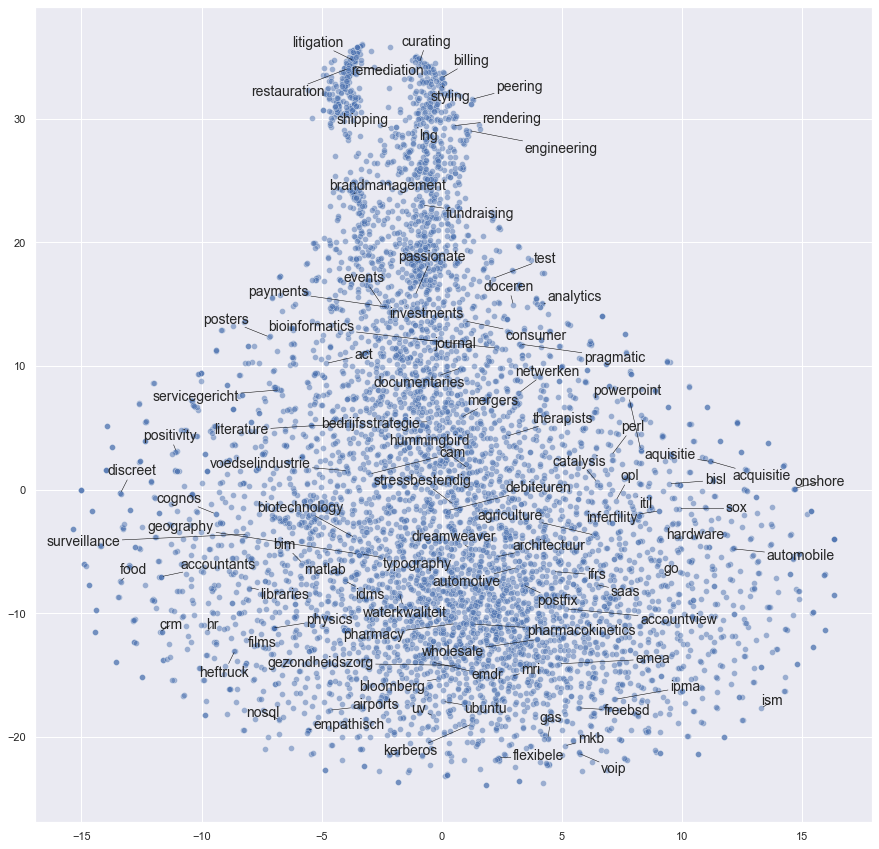

In [27]:
w2v_data.set_index('word', inplace=True)
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

texts = []
words_to_plot = list(np.arange(0, 1000, 10))

for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], w2v_data.index[word], fontsize = 14))
    
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [36]:
weight_cosine.to_csv(r'C:\Users\manas\Documents\Master Thesis\code\Manasa2022\results\weight_cosinev8.csv', header=True, index=False)

In [34]:
from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(jobFnc[:5420])

C:\Users\manas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


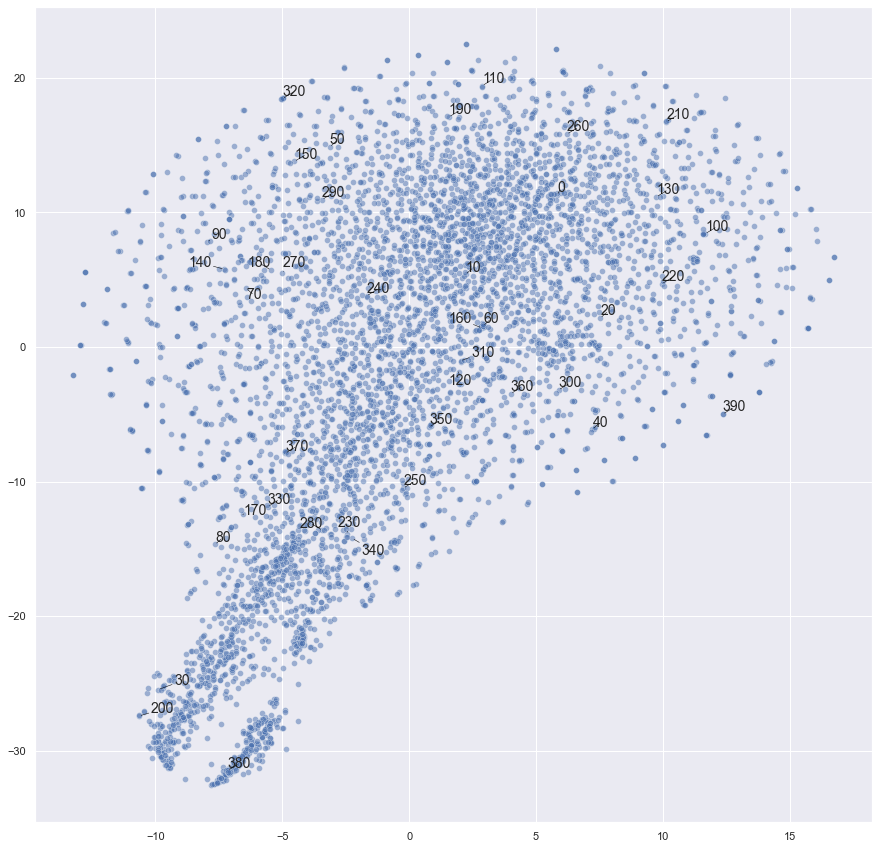

In [35]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [ ]:
#Using the pre trained model of fasttext 

In [6]:
import gensim.downloader as api

In [9]:
# Load word2vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\GoogleNews-vectors-negative300.bin.gz", binary = True) 

# Check dimension of word vectors
model.vector_size

300

In [11]:
model['highlight']

array([-0.17675781,  0.1484375 , -0.0534668 , -0.08349609,  0.265625  ,
       -0.14941406,  0.17285156, -0.11767578,  0.17382812,  0.14550781,
       -0.13183594, -0.19824219,  0.22558594,  0.16601562,  0.17773438,
       -0.00157928,  0.12890625,  0.03710938, -0.0100708 , -0.16894531,
        0.15820312,  0.22265625, -0.08984375,  0.27539062, -0.19824219,
       -0.08935547,  0.125     ,  0.11962891,  0.10888672,  0.04492188,
       -0.16113281, -0.01220703,  0.1328125 ,  0.25195312, -0.01000977,
       -0.06689453, -0.04663086, -0.12597656,  0.33984375,  0.07373047,
        0.23632812,  0.16113281, -0.12402344,  0.17089844, -0.02172852,
       -0.06689453, -0.15722656,  0.00259399,  0.17285156,  0.13671875,
        0.04174805,  0.14746094,  0.10839844, -0.07177734, -0.26953125,
       -0.0625    , -0.10644531, -0.04150391,  0.234375  ,  0.03222656,
       -0.01251221, -0.01660156,  0.08740234, -0.18652344,  0.08007812,
        0.13476562, -0.3515625 ,  0.26171875,  0.17578125,  0.09

In [12]:
words = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\data\preprocessed_data.csv")
words

,skills
0,emdr
1,io
2,productdevelopment
3,businessdevelopment
4,automatisering
...,...
633591,employeebenefit
633592,administration
633593,managementconsult
633594,changemanagement


In [14]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words['skills'] if word in model.index_to_key]
#vector_list
words_filtered = [word for word in words['skills'] if word in model.index_to_key]
words_filtered
word_vec_zip = zip(words_filtered, vector_list)
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
io,-0.310547,0.123535,0.143555,-0.019287,-0.122070,0.065918,-0.164062,0.110352,-0.198242,-0.097168,...,0.183594,0.041992,-0.053223,0.257812,0.234375,-0.075195,-0.006989,-0.114258,-0.190430,0.136719
productdevelopment,-0.173828,0.039062,-0.128906,-0.032715,-0.064453,0.015869,0.012939,-0.111328,0.128906,-0.033691,...,-0.054932,0.118652,-0.146484,0.031250,0.101074,0.021240,0.150391,0.014221,0.095215,0.001854
research,-0.123047,-0.048096,-0.064453,0.092285,0.041992,0.019775,0.197266,-0.213867,0.136719,-0.139648,...,-0.056885,-0.111816,-0.122070,0.221680,0.083984,0.013123,0.002655,-0.025879,0.084473,0.010925
communication,0.002686,-0.233398,-0.080566,-0.059082,-0.084961,0.121582,0.053711,-0.089844,0.075195,-0.013916,...,-0.118164,0.006500,-0.159180,-0.137695,0.053955,-0.000793,0.003387,-0.084961,-0.126953,0.132812
illustrator,0.117676,-0.304688,-0.451172,0.257812,0.173828,0.283203,-0.006287,0.244141,-0.058594,-0.259766,...,-0.141602,-0.053711,-0.257812,0.019165,0.109863,-0.026855,-0.127930,-0.014343,0.001068,-0.244141
photoshop,0.153320,0.206055,-0.241211,0.045410,-0.072754,0.328125,0.157227,0.145508,0.018677,-0.104980,...,-0.341797,0.137695,0.007141,0.119141,0.427734,-0.062500,0.018555,0.021851,-0.214844,0.216797
seo,0.075684,0.242188,0.002151,-0.068359,0.318359,0.194336,0.132812,-0.072754,0.139648,-0.169922,...,0.310547,-0.120117,0.046387,0.235352,0.159180,-0.198242,0.037354,-0.292969,-0.251953,0.330078
wordpress,0.094238,0.108398,0.081543,-0.012390,-0.194336,0.109375,0.108398,-0.040283,0.095703,-0.120605,...,0.169922,0.162109,-0.062988,0.135742,0.181641,-0.071777,0.086426,-0.194336,-0.225586,0.182617
vehicles,0.332031,0.214844,0.271484,0.086914,-0.108887,-0.226562,0.074219,-0.097656,0.265625,-0.161133,...,-0.378906,-0.032471,-0.000843,-0.095703,0.026367,-0.036865,-0.152344,0.125000,0.056152,-0.219727
automotive,0.033447,-0.037598,-0.069336,0.111328,-0.125000,0.283203,-0.024170,-0.030884,0.048828,0.121582,...,-0.328125,0.120117,-0.105469,0.102051,0.109863,-0.039551,0.020264,0.229492,0.141602,-0.296875


In [27]:
len(df)

5420

In [28]:
from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:5420])

C:\Users\manas\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


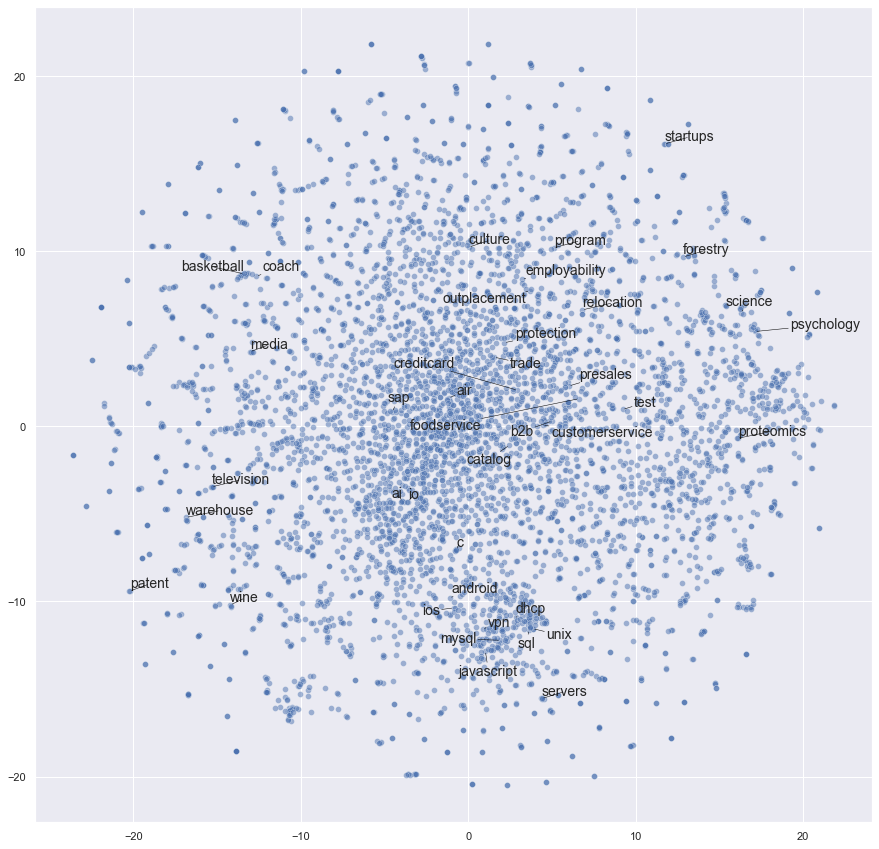

In [31]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()